In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y: 정기예금 가입여부

In [5]:
df = pd.read_csv("bank.csv", sep = ";")
df.head(1)

age         job  marital education default  balance housing loan   contact  \
0   30  unemployed  married   primary      no     1787      no   no  cellular   

   day month  duration  campaign  pdays  previous poutcome   y  
0   19   oct        79         1     -1         0  unknown  no

In [6]:
df_dum = pd.get_dummies(df)
df_dum.head(1)

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   30     1787   19        79         1     -1         0           0   

   job_blue-collar  job_entrepreneur  ...  month_may  month_nov  month_oct  \
0                0                 0  ...          0          0          1   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   

   poutcome_unknown  y_no  y_yes  
0                 1     1      0  

[1 rows x 53 columns]

In [16]:
model1 = RandomForestClassifier().fit(X = df_dum.iloc[:, :-1],
                                      y = df_dum["y_yes"])
df_feat = pd.Series(model1.feature_importances_, 
                    index = df_dum.columns[:-1])
df_feat.reset_index().sort_values(0, ascending = False)

index         0
51                 y_no  0.720319
3              duration  0.091045
49     poutcome_success  0.023938
0                   age  0.019596
1               balance  0.017159
2                   day  0.013992
5                 pdays  0.013608
6              previous  0.007426
45            month_oct  0.006957
4              campaign  0.006514
50     poutcome_unknown  0.004524
20      marital_married  0.003789
29          housing_yes  0.003701
42            month_mar  0.003427
47     poutcome_failure  0.003198
43            month_may  0.003130
34      contact_unknown  0.003068
28           housing_no  0.002986
32     contact_cellular  0.002935
24   education_tertiary  0.002790
41            month_jun  0.002600
19     marital_divorced  0.002389
36            month_aug  0.002342
35            month_apr  0.002342
12          job_retired  0.002235
21       marital_single  0.002221
22    education_primary  0.002114
23  education_secondary  0.002096
11       job_management  0.002083
16       job_technician  0.002059
8       job_blue-collar  0.001913
7            job_admin.  0.001719
30              loan_no  0.001625
48       poutcome_other  0.001564
38            month_feb  0.001526
44            month_nov  0.001515
46            month_sep  0.001410
40            month_jul  0.001380
33    contact_telephone  0.001322
31             loan_yes  0.001299
25    education_unknown  0.001263
14         job_services  0.001040
15          job_student  0.000974
9      job_entrepreneur  0.000695
39            month_jan  0.000648
10        job_housemaid  0.000590
13    job_self-employed  0.000586
26           default_no  0.000505
27          default_yes  0.000500
37            month_dec  0.000495
17       job_unemployed  0.000459
18          job_unknown  0.000394

In [14]:
model2 = RandomForestClassifier().fit(X = df_dum.iloc[:, :-2],
                                      y = df_dum["y_yes"])
df_feat = pd.Series(model2.feature_importances_, 
                    index = df_dum.columns[:-2])
df_feat.reset_index().sort_values(0, ascending = False)

index         0
3              duration  0.254582
0                   age  0.088649
1               balance  0.088249
2                   day  0.077876
49     poutcome_success  0.039812
5                 pdays  0.039375
4              campaign  0.038104
6              previous  0.020586
45            month_oct  0.016833
20      marital_married  0.013558
28           housing_no  0.013085
24   education_tertiary  0.012866
29          housing_yes  0.012724
36            month_aug  0.012621
23  education_secondary  0.012452
35            month_apr  0.012330
43            month_may  0.011870
41            month_jun  0.011816
11       job_management  0.011353
32     contact_cellular  0.011280
16       job_technician  0.010728
47     poutcome_failure  0.010418
21       marital_single  0.010313
42            month_mar  0.010143
8       job_blue-collar  0.010054
7            job_admin.  0.009498
19     marital_divorced  0.009391
34      contact_unknown  0.008848
44            month_nov  0.008812
40            month_jul  0.008515
22    education_primary  0.008316
38            month_feb  0.008264
12          job_retired  0.008153
50     poutcome_unknown  0.006953
30              loan_no  0.006610
31             loan_yes  0.006397
14         job_services  0.005768
33    contact_telephone  0.005749
46            month_sep  0.005701
48       poutcome_other  0.005411
25    education_unknown  0.004764
9      job_entrepreneur  0.004177
15          job_student  0.004051
13    job_self-employed  0.003980
39            month_jan  0.003747
10        job_housemaid  0.003505
17       job_unemployed  0.002923
26           default_no  0.002466
18          job_unknown  0.002461
37            month_dec  0.001971
27          default_yes  0.001894

### Q1. df_dum 객체를 대상으로 Random Forest 분석을 실시하시오. 모델에 사용되는 tree 개수를 증가시켜가면서 그 성능변화를 확인하시오.
※ train, test 분할시 비율은 7:3 으로 실시  
※ random_state 인자에 할당되는 값은 1  
※ 분석에서 y_no 변수는 제외  
※ 분류모델 평가지표는 Accuracy  
※ tree 개수는 200개 부터 200씩 증가시켜 2000개 까지 확인  
※ tree 개수에 따른 Acc. 는 데이터프레임으로 정리하고 "RF_perf.csv" 파일에 저장

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
df_train, df_test = train_test_split(df_dum.drop("y_no", axis = 1),
                                     train_size = 0.7,
                                     random_state = 1)

In [ ]:
model = RandomForestClassifier(n_estimators = 200, 
                               random_state = 1)
model.fit(X = df_train.drop("y_yes", axis = 1),
          y = df_train["y_yes"])
pred = model.predict(df_test.drop("y_yes", axis = 1))
accuracy_score(df_test["y_yes"], pred)

In [ ]:
for n in range(200, 2001, 200):
    print(n)

In [28]:
df_perf = pd.DataFrame()
for n in range(200, 2001, 200):
    # Random Forest 관련 코드
    df_perf_sub = pd.DataFrame(dict(n = [n], acc = [0.8]))
    df_perf = pd.concat([df_perf, df_perf_sub])

df_perf = df_perf.reset_index(drop = True)
df_perf

n  acc
0   200  0.8
1   400  0.8
2   600  0.8
3   800  0.8
4  1000  0.8
5  1200  0.8
6  1400  0.8
7  1600  0.8
8  1800  0.8
9  2000  0.8

In [30]:
df_perf = pd.DataFrame()
for n in range(200, 2001, 200):
    model = RandomForestClassifier(n_estimators = n, 
                                   random_state = 1)
    model.fit(X = df_train.drop("y_yes", axis = 1),
              y = df_train["y_yes"])
    pred = model.predict(df_test.drop("y_yes", axis = 1))
    value_acc = accuracy_score(df_test["y_yes"], pred)
    
    df_perf_sub = pd.DataFrame(dict(n = [n], acc = [value_acc]))
    df_perf = pd.concat([df_perf, df_perf_sub])

df_perf = df_perf.reset_index(drop = True)
df_perf

n       acc
0   20  0.880619
1   40  0.875461
2   60  0.881356
3   80  0.879882
4  100  0.880619
5  120  0.882830
6  140  0.885777
7  160  0.884304
8  180  0.882830
9  200  0.882830

In [31]:
from tqdm.notebook import tqdm

In [32]:
df_perf = pd.DataFrame()
for n in tqdm(range(200, 2001, 200)):
    model = RandomForestClassifier(n_estimators = n, 
                                   random_state = 1)
    model.fit(X = df_train.drop("y_yes", axis = 1),
              y = df_train["y_yes"])
    pred = model.predict(df_test.drop("y_yes", axis = 1))
    value_acc = accuracy_score(df_test["y_yes"], pred)
    
    df_perf_sub = pd.DataFrame(dict(n = [n], acc = [value_acc]))
    df_perf = pd.concat([df_perf, df_perf_sub])

df_perf = df_perf.reset_index(drop = True)
df_perf

  0%|          | 0/10 [00:00<?, ?it/s]

n       acc
0   200  0.882830
1   400  0.882830
2   600  0.882093
3   800  0.879145
4  1000  0.879145
5  1200  0.879882
6  1400  0.881356
7  1600  0.881356
8  1800  0.881356
9  2000  0.880619

### Q2. df_dum 객체를 기준으로 Random Forest 분석을 실시하고 변수의 중요도에 따른 성능변화를 확인하시오. 전체 변수를 사용하는 것 부터 상위 3개를 사용하는 모델의 성능을 측정하시오.
※ 변수 중요도 참고 기준은 n_estimators 값이 200이고 random_state 값이 1인 모델을 기준으로 한다.  
※ train, test 분할은 8:2 로 실시  
※ random_state 값은 1로 지정  
※ n_estimator 값은 20으로 지정

In [40]:
df_train, df_test = train_test_split(df_dum.drop("y_no", axis = 1),
                                     train_size = 0.8,
                                     random_state = 1)
model_base = RandomForestClassifier(n_estimators = 200)
model_base.fit(X = df_train.drop("y_yes", axis = 1),
               y = df_train["y_yes"])
df_perf_base = pd.DataFrame(dict(col = df_train.columns[:-1],
                                 imp = model_base.feature_importances_))
df_perf_base = df_perf_base.sort_values("imp", ascending = False)
df_perf_base = df_perf_base.reset_index(drop = True)
df_perf_base.head(2)

col       imp
0  duration  0.256311
1       age  0.087202

In [53]:
len(df_perf_base) - 3

48

In [50]:
value = 48

In [54]:
df_perf_base["col"][:(-value)]

0    duration
1         age
2     balance
Name: col, dtype: object

In [41]:
np.arange(10, 1, -1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

In [56]:
np.arange(len(df_perf_base) - 3 + 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [58]:
df_acc = pd.DataFrame()
for n in tqdm(np.arange(len(df_perf_base) - 3 + 1)):
    # 학습 코드
    # 정확도 계산 코드
    # 정확도 계산 결과 누적 코드
    
# 정확도 계산 결과 정리 코드

IndentationError: expected an indented block (Temp/ipykernel_7212/3396843629.py, line 7)

In [59]:
df_train.head(1)

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
2456   59     3163   29       240         2     -1         0           0   

      job_blue-collar  job_entrepreneur  ...  month_mar  month_may  month_nov  \
2456                0                 0  ...          0          1          0   

      month_oct  month_sep  poutcome_failure  poutcome_other  \
2456          0          0                 0               0   

      poutcome_success  poutcome_unknown  y_yes  
2456                 0                 1      0  

[1 rows x 52 columns]

In [65]:
df_acc = pd.DataFrame()
for n in tqdm(np.arange(len(df_perf_base) - 3 + 1)):
    model = RandomForestClassifier(n_estimators = 200)
    model.fit(X = df_train.iloc[:, :(-n - 1)],
              y = df_train["y_yes"])
    pred = model.predict(df_test.iloc[:, :(-n - 1)])
    value_acc = accuracy_score(df_test["y_yes"], pred)
    
    df_acc_sub = pd.DataFrame(dict(col_cnt = [len(df_perf_base) - n],
                                   acc = [value_acc]))
    df_acc = pd.concat([df_acc, df_acc_sub])
    
df_acc = df_acc.reset_index(drop = True)

  0%|          | 0/49 [00:00<?, ?it/s]

<AxesSubplot:xlabel='col_cnt'>

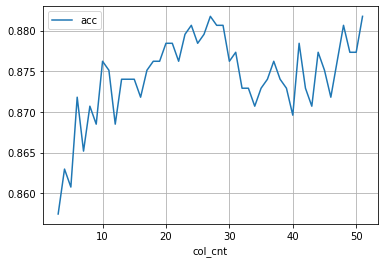

In [66]:
df_acc.set_index("col_cnt").plot.line(grid = True)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [68]:
df = pd.read_csv("iris.csv")
X = df.drop("Species", axis = 1)
X = StandardScaler().fit_transform(X)
df_X = pd.DataFrame(X, columns = df.columns[:-1])

In [70]:
model = PCA(n_components = 2) # 주성분 2개
pca = model.fit_transform(df_X)
df_pca = pd.DataFrame(pca, columns = ["pc1", "pc2"])
df_pca.head(3)

pc1       pc2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908

In [71]:
len(df_pca)

150

In [72]:
model.explained_variance_

array([2.93808505, 0.9201649 ])

In [73]:
model.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [74]:
model.explained_variance_ratio_.sum()

0.9581320720000164

In [75]:
model2 = PCA(n_components = 4) # 주성분 4개
pca2 = model2.fit_transform(df_X)

In [76]:
df_var = pd.DataFrame(dict(pc_num = ["pc1", "pc2", "pc3", "pc4"],
                           var = model2.explained_variance_ratio_))
df_var["ratio_c"] = df_var["var"].cumsum()
df_var

pc_num       var   ratio_c
0    pc1  0.729624  0.729624
1    pc2  0.228508  0.958132
2    pc3  0.036689  0.994821
3    pc4  0.005179  1.000000

In [77]:
import matplotlib.pyplot as plt

In [ ]:
df_var = df_var.set_index("pc_num") # 막대그래프의 x축의 값표기를 위한 조치

<AxesSubplot:xlabel='pc_num', ylabel='ratio_c'>

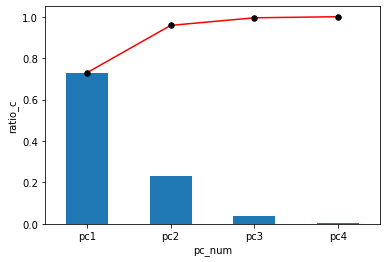

In [85]:
ax = plt.subplot(1, 1, 1) # 1 x 1에서 첫 번째 도화지.
ax = df_var["var"].plot.bar(legend = None, zorder = 0) # 막대그래프(바닥)
ax = df_var["ratio_c"].plot.line(ax = ax, color = "#FF0000",
                                 legend = None, zorder = 1) # 선그래프(위에)
df_point = df_var["ratio_c"].reset_index() # 산점도를 위한 조치
ax = df_point.plot.scatter(ax = ax,
                           x = "pc_num", y = "ratio_c",
                           color = "#000000", s = 30,
                           legend = None, zorder = 2)
ax

In [87]:
df_var.transpose()

pc_num        pc1       pc2       pc3       pc4
var      0.729624  0.228508  0.036689  0.005179
ratio_c  0.729624  0.958132  0.994821  1.000000

In [100]:
dia = pd.read_csv("diamonds.csv")
dia.tail(1)

carat    cut color clarity  depth  table  price     x     y     z
53939   0.75  Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

In [89]:
np.repeat([1, 2, 3], repeats = 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [90]:
len(dia)

53940

In [97]:
ser_idx = pd.Series(np.repeat(range(10), repeats = len(dia)/10))
ser_idx = ser_idx.sample(frac = 1, random_state = 123)
ser_idx = ser_idx.reset_index(drop = True)
ser_idx[:3]

0    6
1    6
2    2
dtype: int32

In [98]:
# ser_idx.value_counts()

In [ ]:
for n in range(10):
    print(n)

In [ ]:
# 추론값 취합 객체 준비
for n in range(10):
    # train set 를 뽑아내는 코드
    # test set 를 뽑아내는 코드
    # 학습 코드
    # 추론(예측값 생산) 코드
    # 추론값 취합

# 추론값 취합 객체 정리 코드

In [ ]:
df_perf = pd.DataFrame()
for n in range(10):
    # train set 를 뽑아내는 코드
    # test set 를 뽑아내는 코드
    # 학습 코드
    # 추론(예측값 생산) 코드
    df_perf_sub = pd.DataFrame(dict(no = [1], value = [123]))
    df_perf = pd.concat([df_perf, df_perf_sub])
    
df_perf = df_perf.reset_index(drop = True)

In [102]:
df_s = pd.DataFrame(dict(n = [1, 2, 3],
                         v = [7, 8, 9]))
ser_s = pd.Series([1, 2, 3])
ser_s 

0    1
1    2
2    3
dtype: int64

In [103]:
ser_s != 2

0     True
1    False
2     True
dtype: bool

In [105]:
# df_s.loc[df_s["n"] != 2, ]
df_s.loc[ser_s != 2, ]

n  v
0  1  7
2  3  9

In [111]:
dia_num = dia.select_dtypes(include = "number")
dia_num.head(1)

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [115]:
df_perf = pd.DataFrame()
for n in tqdm(range(10)):
    dia_num_tr = dia_num.loc[ser_idx != n, ]
    dia_num_te = dia_num.loc[ser_idx == n, ]
    model = RandomForestRegressor().fit(X = dia_num_tr.drop("price", axis = 1),
                                        y = dia_num_tr["price"])
    pred = model.predict(dia_num_te.drop("price", axis = 1))
    value_rmse = mean_squared_error(y_true = dia_num_te["price"],
                                    y_pred = pred)
    
    df_perf_sub = pd.DataFrame(dict(no = [n], value = [value_rmse]))
    df_perf = pd.concat([df_perf, df_perf_sub])
    
df_perf = df_perf.reset_index(drop = True)

  0%|          | 0/10 [00:00<?, ?it/s]

In [119]:
df_perf["value"] = round(df_perf["value"] ** 0.5, 2)

In [121]:
df_perf["value"].mean()

1378.048

In [122]:
df_perf["value"].max()

1465.39

In [123]:
from itertools import product

In [125]:
l1 = ["A", "B", "C"]
l2 = [1, 2]
list(product(l1, l2))

[('A', 1), ('A', 2), ('B', 1), ('B', 2), ('C', 1), ('C', 2)]

In [127]:
pd.DataFrame(product(l1, l2), columns = ["p1", "p2"])

p1  p2
0  A   1
1  A   2
2  B   1
3  B   2
4  C   1
5  C   2